<a href="https://colab.research.google.com/github/merfurfu/Computer-Vision-Project/blob/vic_work/vicwork_ComputerVisionProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1> <b> Object Classification Using YOLO <b> </h1></center>

Classifying red onions and apples based on images taken at supermarkets.

## Importing required libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import cv2
import seaborn as sns
import glob
import xml.etree.ElementTree as ET
from PIL import Image
import os
import shutil

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd "/content/drive/MyDrive/Colab Notebooks/Computer Vision"
!ls

/content/drive/MyDrive/Colab Notebooks/Computer Vision
'Computer Vision Idea & Plan.gdoc'   Photos	    prediction3.jpg   yolov8n-cls.pt
'Oranges (just in case)'	     predict1.jpg   runs	      yolov8s-cls.pt


First install and import

In [4]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.1.27 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 28.9/107.7 GB disk)


In [5]:
from ultralytics import YOLO

## Loading Pre-Trained YOLO

### Model 1  (nano, epochs=2, patience=5, batch=8, lr0=0.0005, imgsz=640)(train2)

In [7]:
model = YOLO('yolov8n-cls.pt')  # load a pretrained YOLOv8n classification model

Please look at [Yolo train Docs](https://docs.ultralytics.com/modes/train/#train-settings) for hyperparameters for model tuning and configuration, e.g. lr0, imgsz, model etc.

In [8]:
#Training model 1 with our own data
model.train(data="/content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos",epochs=2,patience=5,batch=8, lr0=0.0005,imgsz=640)

Ultralytics YOLOv8.1.27 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=/content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos, epochs=2, time=None, patience=5, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, s

train: Scanning /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/train... 34 images, 0 corrupt: 100%|██████████| 34/34 [00:35<00:00,  1.05s/it]

train: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/train/Apples/20240313_135836.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/train/Apples/20240313_140123.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/train/Apples/20240313_140200.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/train/Apples/20240313_140230.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/train/Apples/20240313_140248.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/train/Apples/20240313_140349.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/train/Apples/20240313_140812.jpg: corrupt JP


val: Scanning /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/val... 36 images, 0 corrupt: 100%|██████████| 36/36 [00:31<00:00,  1.14it/s]

val: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/val/Apples/20240313_135641.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/val/Apples/20240313_140215.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/val/Apples/20240313_140243.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/val/Apples/20240313_140304.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/val/Apples/20240313_140314.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/val/Apples/20240313_140328.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/val/Apples/20240313_140337.jpg: corrupt JPEG restored and saved
val: W

optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0005' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/classify/train2
Starting training for 2 epochs...

      Epoch    GPU_mem       loss  Instances       Size


        1/2     0.942G     0.6716          8        640:  80%|████████  | 4/5 [00:03<00:00,  1.56it/s]

               classes   top1_acc   top5_acc:   0%|          | 0/3 [00:00<?, ?it/s]
  0%|          | 0.00/755k [00:00<?, ?B/s]
 20%|██        | 152k/755k [00:00<00:00, 1.21MB/s]
 36%|███▌      | 272k/755k [00:00<00:00, 773kB/s] 
 48%|████▊     | 360k/755k [00:00<00:00, 649kB/s]
 57%|█████▋    | 432k/755k [00:00<00:00, 644kB/s]
 67%|██████▋   | 504k/755k [00:00<00:00, 593kB/s]
100%|██████████| 755k/755k [00:00<00:00, 810kB/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:24<00:00,  8.15s/it]

                   all      0.639          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:19<00:00,  6.37s/it]

                   all      0.639          1



2 epochs completed in 0.016 hours.
Optimizer stripped from runs/classify/train2/weights/last.pt, 3.0MB
Optimizer stripped from runs/classify/train2/weights/best.pt, 3.0MB

Validating runs/classify/train2/weights/best.pt...
Ultralytics YOLOv8.1.27 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 1437442 parameters, 0 gradients, 3.3 GFLOPs
train: /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/train... found 42 images in 2 classes ✅ 
val: /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/val... found 40 images in 2 classes ✅ 
test: None...


               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:17<00:00,  5.87s/it]


                   all      0.639          1
Speed: 0.6ms preprocess, 2.3ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train2
Results saved to runs/classify/train2


ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c21ddf38a00>
curves: []
curves_results: []
fitness: 0.8194444477558136
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.6388888955116272, 'metrics/accuracy_top5': 1.0, 'fitness': 0.8194444477558136}
save_dir: PosixPath('runs/classify/train2')
speed: {'preprocess': 0.6126628981696235, 'inference': 2.3024876912434897, 'loss': 0.0016027026706271702, 'postprocess': 0.0011391109890407985}
task: 'classify'
top1: 0.6388888955116272
top5: 1.0

### Model 2 (n, epochs=15,patience=5,batch=8, lr0=0.0005,imgsz=640) (train3)

In [24]:
model2 = YOLO('yolov8n-cls.pt')  # load a pretrained YOLOv8n classification model

In [25]:
#Training model 1 with our own data
model2.train(data="/content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos",epochs=15,patience=5,batch=8, lr0=0.0005,imgsz=640)

Ultralytics YOLOv8.1.27 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=/content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos, epochs=15, time=None, patience=5, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, 

train: Scanning /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/train... 34 images, 0 corrupt: 100%|██████████| 34/34 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/train/Apples/20240313_135836.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/train/Apples/20240313_140123.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/train/Apples/20240313_140200.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/train/Apples/20240313_140230.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/train/Apples/20240313_140248.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/train/Apples/20240313_140349.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/train/Apples/20240313_140812.jpg: corrupt JP


val: Scanning /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/val... 36 images, 0 corrupt: 100%|██████████| 36/36 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/val/Apples/20240313_135641.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/val/Apples/20240313_140215.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/val/Apples/20240313_140243.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/val/Apples/20240313_140304.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/val/Apples/20240313_140314.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/val/Apples/20240313_140328.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/val/Apples/20240313_140337.jpg: corrupt JPEG restored and saved
val: W

optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0005' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/classify/train3
Starting training for 15 epochs...

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:03<00:00,  1.20s/it]

                   all      0.639          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:01<00:00,  2.46it/s]

                   all      0.639          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:05<00:00,  1.68s/it]

                   all      0.639          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 13.78it/s]

                   all      0.667          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:01<00:00,  2.64it/s]

                   all      0.694          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 20.38it/s]

                   all      0.778          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 24.52it/s]

                   all      0.806          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:01<00:00,  2.82it/s]

                   all      0.806          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:02<00:00,  1.15it/s]

                   all      0.806          1



      Epoch    GPU_mem       loss  Instances       Size


      10/15     0.828G     0.4971          2        640: 100%|██████████| 5/5 [00:21<00:00,  4.35s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:02<00:00,  1.12it/s]

                   all      0.833          1



      Epoch    GPU_mem       loss  Instances       Size


      11/15     0.828G     0.4627          2        640: 100%|██████████| 5/5 [00:24<00:00,  4.95s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:03<00:00,  1.19s/it]

                   all      0.889          1



      Epoch    GPU_mem       loss  Instances       Size


      12/15     0.828G     0.4416          2        640: 100%|██████████| 5/5 [00:22<00:00,  4.57s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:06<00:00,  2.19s/it]

                   all      0.833          1



      Epoch    GPU_mem       loss  Instances       Size


      13/15     0.828G     0.4134          2        640: 100%|██████████| 5/5 [00:22<00:00,  4.48s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:01<00:00,  1.58it/s]

                   all      0.806          1



      Epoch    GPU_mem       loss  Instances       Size


      14/15     0.828G     0.4242          2        640: 100%|██████████| 5/5 [00:19<00:00,  3.99s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:03<00:00,  1.06s/it]

                   all      0.806          1



      Epoch    GPU_mem       loss  Instances       Size


      15/15     0.828G     0.4245          2        640: 100%|██████████| 5/5 [00:27<00:00,  5.42s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:01<00:00,  2.77it/s]

                   all      0.806          1



15 epochs completed in 0.114 hours.
Optimizer stripped from runs/classify/train3/weights/last.pt, 3.0MB
Optimizer stripped from runs/classify/train3/weights/best.pt, 3.0MB

Validating runs/classify/train3/weights/best.pt...
Ultralytics YOLOv8.1.27 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 1437442 parameters, 0 gradients, 3.3 GFLOPs
train: /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/train... found 42 images in 2 classes ✅ 
val: /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/val... found 40 images in 2 classes ✅ 
test: None...


               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:22<00:00,  7.50s/it]


                   all      0.889          1
Speed: 0.9ms preprocess, 2.3ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train3
Results saved to runs/classify/train3


ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c21ac26ebf0>
curves: []
curves_results: []
fitness: 0.9444444477558136
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.8888888955116272, 'metrics/accuracy_top5': 1.0, 'fitness': 0.9444444477558136}
save_dir: PosixPath('runs/classify/train3')
speed: {'preprocess': 0.9175009197658963, 'inference': 2.297653092278374, 'loss': 0.0012914339701334636, 'postprocess': 0.0011391109890407985}
task: 'classify'
top1: 0.8888888955116272
top5: 1.0

### Model 3 (s, epochs=15,patience=5,batch=8, lr0=0.0005,imgsz=640) (train4)

same paramters as model 2 but on pretrained yolo model s NOT nano

In [6]:
model3 = YOLO('yolov8s-cls.pt')  # load a pretrained YOLOv8n classification model

In [45]:
#Training model 1 with our own data
model3.train(data="/content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos",epochs=15,patience=5,batch=8, lr0=0.0005,imgsz=640)

Ultralytics YOLOv8.1.27 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=yolov8s-cls.pt, data=/content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos, epochs=15, time=None, patience=5, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, 

train: Scanning /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/train... 34 images, 0 corrupt: 100%|██████████| 34/34 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/train/Apples/20240313_135836.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/train/Apples/20240313_140123.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/train/Apples/20240313_140200.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/train/Apples/20240313_140230.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/train/Apples/20240313_140248.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/train/Apples/20240313_140349.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/train/Apples/20240313_140812.jpg: corrupt JP


val: Scanning /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/val... 36 images, 0 corrupt: 100%|██████████| 36/36 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/val/Apples/20240313_135641.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/val/Apples/20240313_140215.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/val/Apples/20240313_140243.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/val/Apples/20240313_140304.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/val/Apples/20240313_140314.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/val/Apples/20240313_140328.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/val/Apples/20240313_140337.jpg: corrupt JPEG restored and saved
val: W

optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0005' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/classify/train4
Starting training for 15 epochs...

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:03<00:00,  1.04s/it]

                   all      0.222          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:13<00:00,  4.54s/it]

                   all      0.361          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:42<00:00, 14.14s/it]

                   all        0.5          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:31<00:00, 10.56s/it]

                   all      0.694          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 16.57it/s]

                   all      0.778          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 16.32it/s]

                   all      0.833          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  4.31it/s]

                   all      0.833          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:02<00:00,  1.25it/s]

                   all      0.833          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:06<00:00,  2.17s/it]

                   all      0.833          1



      Epoch    GPU_mem       loss  Instances       Size


      10/15       1.5G     0.4761          2        640: 100%|██████████| 5/5 [00:15<00:00,  3.16s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:07<00:00,  2.44s/it]

                   all      0.861          1



      Epoch    GPU_mem       loss  Instances       Size


      11/15       1.5G     0.4243          2        640: 100%|██████████| 5/5 [00:17<00:00,  3.50s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:11<00:00,  3.91s/it]

                   all      0.889          1



      Epoch    GPU_mem       loss  Instances       Size


      12/15       1.5G     0.4176          2        640: 100%|██████████| 5/5 [00:11<00:00,  2.20s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:12<00:00,  4.03s/it]

                   all      0.889          1



      Epoch    GPU_mem       loss  Instances       Size


      13/15       1.5G       0.36          2        640: 100%|██████████| 5/5 [00:15<00:00,  3.18s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:11<00:00,  4.00s/it]

                   all      0.889          1



      Epoch    GPU_mem       loss  Instances       Size


      14/15      1.49G     0.3857          2        640: 100%|██████████| 5/5 [00:09<00:00,  1.82s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:14<00:00,  4.71s/it]

                   all      0.889          1



      Epoch    GPU_mem       loss  Instances       Size


      15/15      1.48G     0.3792          2        640: 100%|██████████| 5/5 [00:08<00:00,  1.72s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:17<00:00,  5.72s/it]

                   all      0.889          1



15 epochs completed in 0.130 hours.
Optimizer stripped from runs/classify/train4/weights/last.pt, 10.3MB
Optimizer stripped from runs/classify/train4/weights/best.pt, 10.3MB

Validating runs/classify/train4/weights/best.pt...
Ultralytics YOLOv8.1.27 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-cls summary (fused): 73 layers, 5077762 parameters, 0 gradients, 12.4 GFLOPs
train: /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/train... found 42 images in 2 classes ✅ 
val: /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/val... found 40 images in 2 classes ✅ 
test: None...


               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:10<00:00,  3.56s/it]


                   all      0.889          1
Speed: 0.8ms preprocess, 3.0ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train4
Results saved to runs/classify/train4


ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c22102ae470>
curves: []
curves_results: []
fitness: 0.9444444477558136
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.8888888955116272, 'metrics/accuracy_top5': 1.0, 'fitness': 0.9444444477558136}
save_dir: PosixPath('runs/classify/train4')
speed: {'preprocess': 0.7932053671942817, 'inference': 3.012537956237793, 'loss': 0.0012450748019748265, 'postprocess': 0.0011391109890407985}
task: 'classify'
top1: 0.8888888955116272
top5: 1.0

### Model 4 (m, epochs=25,patience=5,batch=8, imgsz=640) (train6)

In [11]:
model4 = YOLO('yolov8m-cls.pt')  # load a pretrained YOLOv8n classification model

100%|██████████| 32.7M/32.7M [00:00<00:00, 97.5MB/s]


In [13]:
#from previous models, there is no need for lr0, it determines it automatically
model4.train(data="/content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos",epochs=25,patience=5,batch=8, imgsz=640)

Ultralytics YOLOv8.1.27 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=classify, mode=train, model=yolov8m-cls.pt, data=/content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos, epochs=25, time=None, patience=5, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train6, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, sho

train: Scanning /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/train... 34 images, 0 corrupt: 100%|██████████| 34/34 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/train/Apples/20240313_135836.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/train/Apples/20240313_140123.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/train/Apples/20240313_140200.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/train/Apples/20240313_140230.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/train/Apples/20240313_140248.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/train/Apples/20240313_140349.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/train/Apples/20240313_140812.jpg: corrupt JP


val: Scanning /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/val... 36 images, 0 corrupt: 100%|██████████| 36/36 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/val/Apples/20240313_135641.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/val/Apples/20240313_140215.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/val/Apples/20240313_140243.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/val/Apples/20240313_140304.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/val/Apples/20240313_140314.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/val/Apples/20240313_140328.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/val/Apples/20240313_140337.jpg: corrupt JPEG restored and saved
val: W

TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/classify/train6
Starting training for 25 epochs...

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:51<00:00, 17.31s/it]

                   all      0.444          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:48<00:00, 16.02s/it]

                   all      0.528          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:50<00:00, 16.74s/it]

                   all      0.611          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:51<00:00, 17.16s/it]

                   all      0.722          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:49<00:00, 16.52s/it]

                   all      0.861          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:50<00:00, 16.97s/it]

                   all      0.917          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:50<00:00, 16.73s/it]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:51<00:00, 17.24s/it]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:51<00:00, 17.25s/it]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


      10/25         0G     0.3493          2        640: 100%|██████████| 5/5 [02:06<00:00, 25.22s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:49<00:00, 16.65s/it]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


      11/25         0G     0.3028          2        640: 100%|██████████| 5/5 [02:16<00:00, 27.36s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:55<00:00, 18.58s/it]

                   all      0.972          1



      Epoch    GPU_mem       loss  Instances       Size


      12/25         0G      0.315          2        640: 100%|██████████| 5/5 [02:29<00:00, 29.92s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:58<00:00, 19.60s/it]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      13/25         0G     0.3993          2        640: 100%|██████████| 5/5 [02:17<00:00, 27.42s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:51<00:00, 17.09s/it]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      14/25         0G     0.2231          2        640: 100%|██████████| 5/5 [02:11<00:00, 26.24s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:54<00:00, 18.28s/it]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      15/25         0G      0.206          2        640: 100%|██████████| 5/5 [02:19<00:00, 27.83s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:54<00:00, 18.08s/it]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      16/25         0G     0.1806          2        640: 100%|██████████| 5/5 [02:05<00:00, 25.14s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:51<00:00, 17.22s/it]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      17/25         0G     0.1326          2        640: 100%|██████████| 5/5 [02:04<00:00, 24.90s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:51<00:00, 17.06s/it]

                   all      0.972          1



      Epoch    GPU_mem       loss  Instances       Size


      18/25         0G      0.331          2        640: 100%|██████████| 5/5 [02:08<00:00, 25.65s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:54<00:00, 18.24s/it]

                   all      0.972          1



      Epoch    GPU_mem       loss  Instances       Size


      19/25         0G     0.2054          2        640: 100%|██████████| 5/5 [02:05<00:00, 25.00s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:49<00:00, 16.54s/it]

                   all      0.972          1



      Epoch    GPU_mem       loss  Instances       Size


      20/25         0G      0.199          2        640: 100%|██████████| 5/5 [02:06<00:00, 25.37s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:48<00:00, 16.10s/it]

                   all      0.972          1



      Epoch    GPU_mem       loss  Instances       Size


      21/25         0G     0.1373          2        640: 100%|██████████| 5/5 [02:03<00:00, 24.80s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:51<00:00, 17.07s/it]

                   all      0.972          1
Stopping training early as no improvement observed in last 5 epochs. Best results observed at epoch 16, best model saved as best.pt.
To update EarlyStopping(patience=5) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



21 epochs completed in 1.092 hours.
Optimizer stripped from runs/classify/train6/weights/last.pt, 31.7MB
Optimizer stripped from runs/classify/train6/weights/best.pt, 31.7MB

Validating runs/classify/train6/weights/best.pt...
Ultralytics YOLOv8.1.27 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8m-cls summary (fused): 103 layers, 15765218 parameters, 0 gradients, 41.6 GFLOPs
train: /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/train... found 42 images in 2 classes ✅ 
val: /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/val... found 40 images in 2 classes ✅ 
test: None...


               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:54<00:00, 18.08s/it]


                   all          1          1
Speed: 0.0ms preprocess, 1002.4ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train6
Results saved to runs/classify/train6


ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e8fa3b23400>
curves: []
curves_results: []
fitness: 1.0
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 1.0, 'metrics/accuracy_top5': 1.0, 'fitness': 1.0}
save_dir: PosixPath('runs/classify/train6')
speed: {'preprocess': 0.002377563052707248, 'inference': 1002.3579663700528, 'loss': 0.0003178914388020833, 'postprocess': 0.00021192762586805553}
task: 'classify'
top1: 1.0
top5: 1.0

## Refining the model with best weights


### Model 1 (nano, epochs=2, patience=5, batch=8, lr0=0.0005, imgsz=640)

In [26]:
model = YOLO("/content/drive/MyDrive/Colab Notebooks/Computer Vision/runs/classify/train2/weights/best.pt")

### Model 2 (n, epochs=15,patience=5,batch=8, lr0=0.0005,imgsz=640)

In [27]:
model2 = YOLO("/content/drive/MyDrive/Colab Notebooks/Computer Vision/runs/classify/train3/weights/best.pt")

### Model 3 (s, epochs=15,patience=5,batch=8, lr0=0.0005,imgsz=640)

In [7]:
model3 = YOLO("/content/drive/MyDrive/Colab Notebooks/Computer Vision/runs/classify/train4/weights/best.pt")

### Model 4 (m, epochs=25,patience=5,batch=8, imgsz=640)

In [14]:
model4 = YOLO("/content/drive/MyDrive/Colab Notebooks/Computer Vision/runs/classify/train6/weights/best.pt")

## Evaluation Metrics

### Model 1 (nano, epochs=2, patience=5, batch=8, lr0=0.0005, imgsz=640) (val4)

In [28]:
#MODEL1 (nano, epochs=2, patience=5, batch=8, lr0=0.0005, imgsz=640)
#running metrics for model 1
metrics1 = model.val()
#because we only have 2 classes!
metrics1.top1

Ultralytics YOLOv8.1.27 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 1437442 parameters, 0 gradients, 3.3 GFLOPs
train: /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/train... found 42 images in 2 classes ✅ 
val: /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/val... found 40 images in 2 classes ✅ 
test: None...


val: Scanning /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/val... 36 images, 0 corrupt: 100%|██████████| 36/36 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/val/Apples/20240313_135641.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/val/Apples/20240313_140215.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/val/Apples/20240313_140243.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/val/Apples/20240313_140304.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/val/Apples/20240313_140314.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/val/Apples/20240313_140328.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/val/Apples/20240313_140337.jpg: corrupt JPEG restored and saved
val: W


               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:19<00:00,  6.55s/it]


                   all      0.639          1
Speed: 0.5ms preprocess, 2.7ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/val4


0.6388888955116272

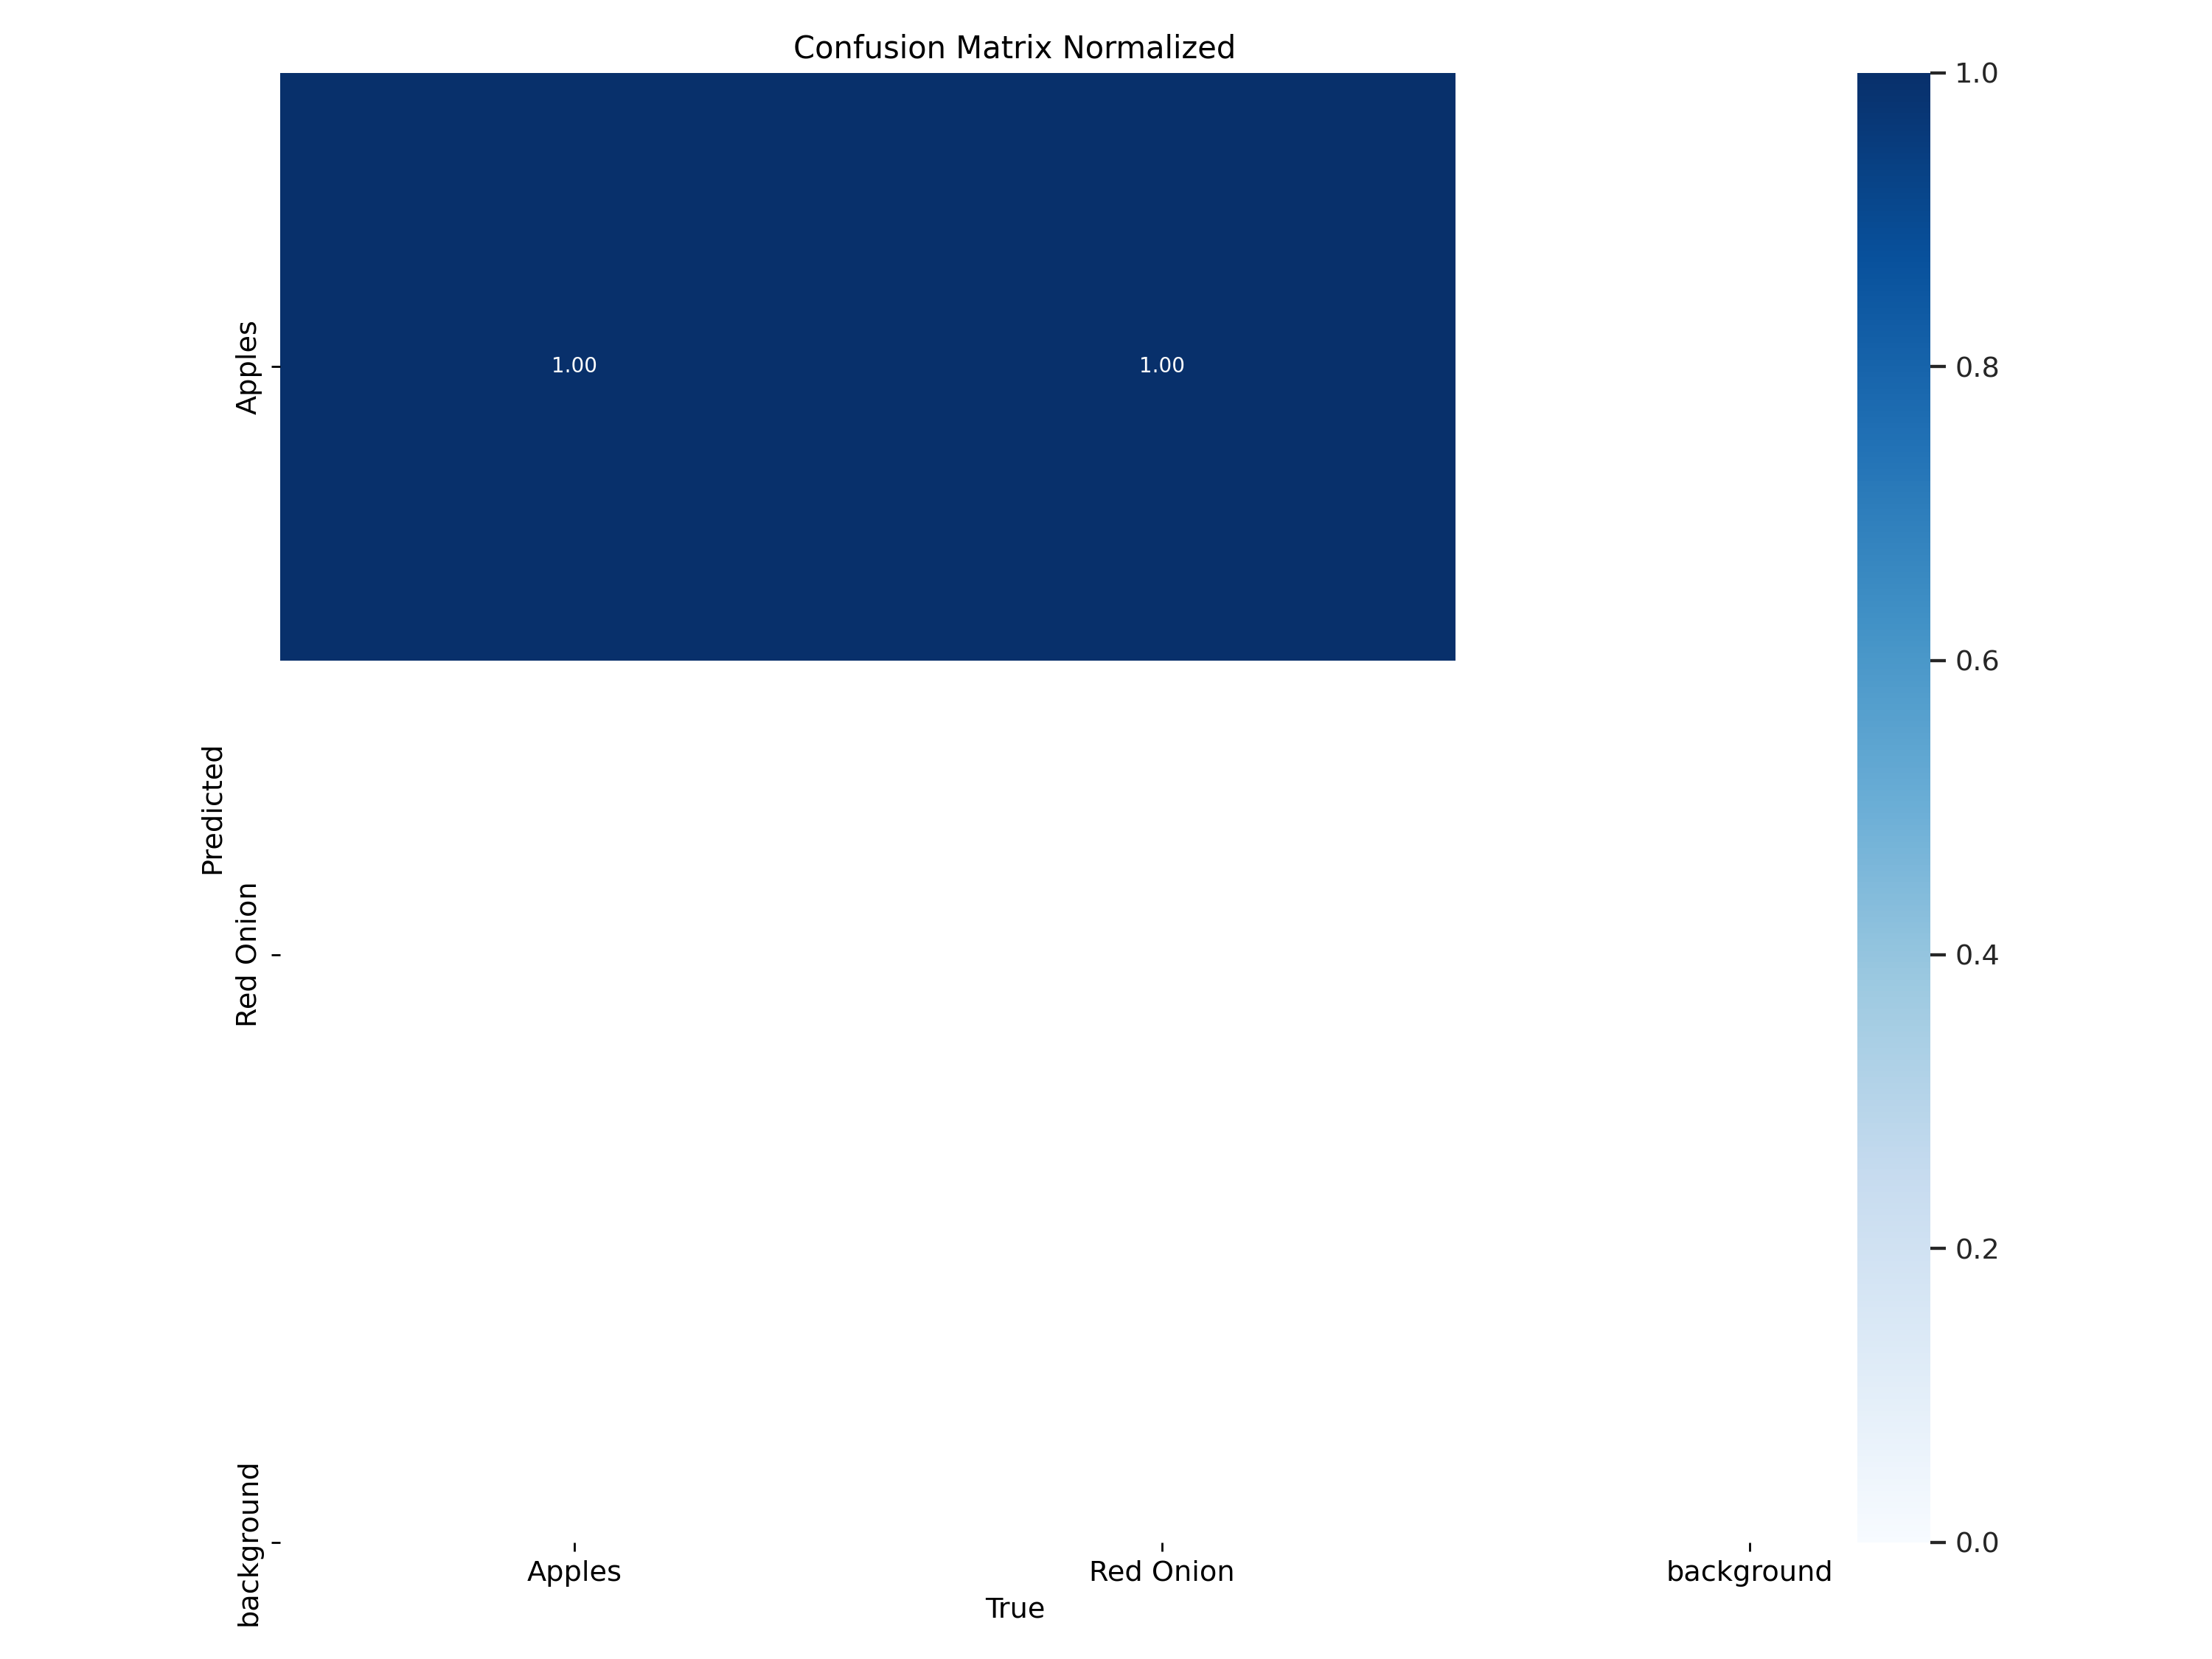

In [55]:
%matplotlib inline
from PIL import Image

#confusing matrix for train 2 (model 1, nano epochs=2,patience=5,batch=8, lr0=0.0005,imgsz=640)
Image.open('/content/drive/MyDrive/Colab Notebooks/Computer Vision/runs/classify/val4/confusion_matrix_normalized.png')

### Model 2 (n, epochs=15,patience=5,batch=8, lr0=0.0005,imgsz=640) (val5)

In [30]:
#MODE2 (n, epochs=15,patience=5,batch=8, lr0=0.0005,imgsz=640)

metrics2 = model2.val()
#because we only have 2 classes!
metrics2.top1

Ultralytics YOLOv8.1.27 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 1437442 parameters, 0 gradients, 3.3 GFLOPs
train: /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/train... found 42 images in 2 classes ✅ 
val: /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/val... found 40 images in 2 classes ✅ 
test: None...


val: Scanning /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/val... 36 images, 0 corrupt: 100%|██████████| 36/36 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/val/Apples/20240313_135641.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/val/Apples/20240313_140215.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/val/Apples/20240313_140243.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/val/Apples/20240313_140304.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/val/Apples/20240313_140314.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/val/Apples/20240313_140328.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/val/Apples/20240313_140337.jpg: corrupt JPEG restored and saved
val: W


               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:25<00:00,  8.56s/it]


                   all      0.889          1
Speed: 0.7ms preprocess, 2.5ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/val5


0.8888888955116272

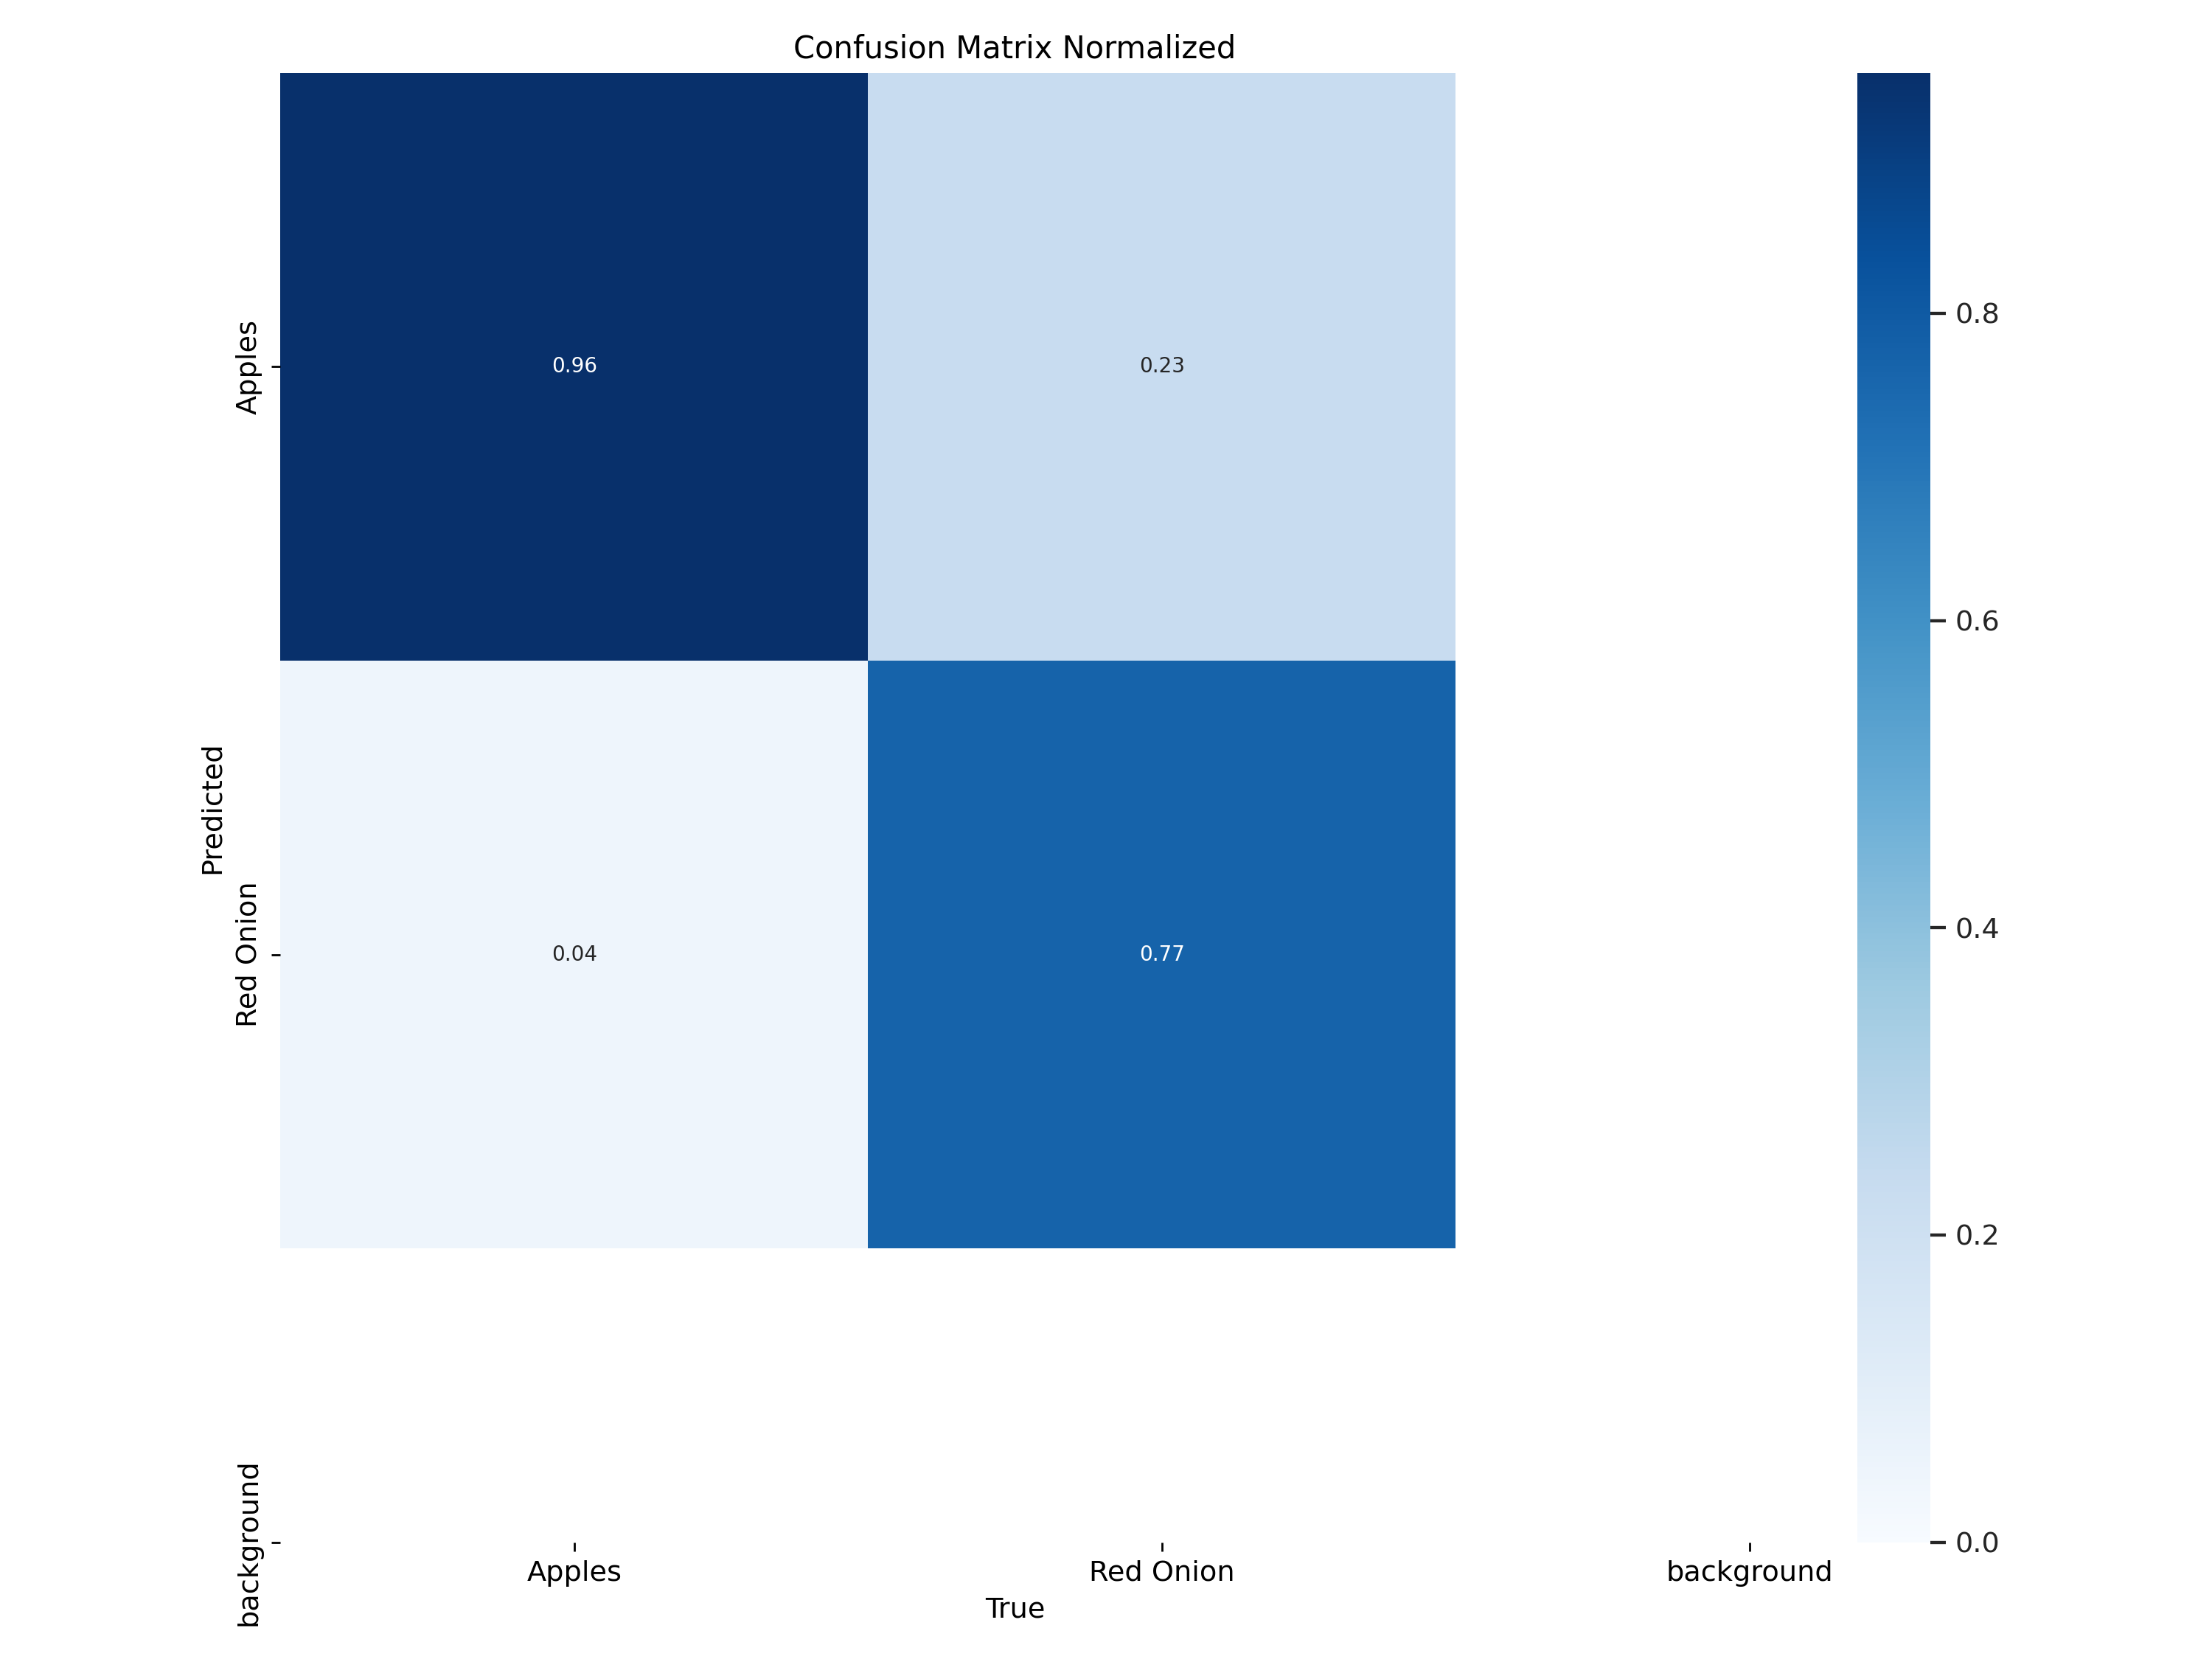

In [56]:
%matplotlib inline
from PIL import Image

#confusing matrix for train 3 (model 2, nano epochs=15,patience=5,batch=8, lr0=0.0005,imgsz=640)
Image.open('/content/drive/MyDrive/Colab Notebooks/Computer Vision/runs/classify/val5/confusion_matrix_normalized.png')

### Model 3 (s, epochs=15,patience=5,batch=8, lr0=0.0005,imgsz=640) (val8)

In [53]:
#MODEL3 (s, epochs=15,patience=5,batch=8, lr0=0.0005,imgsz=640)

metrics3 = model3.val()
#because we only have 2 classes!
metrics3.top1

Ultralytics YOLOv8.1.27 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
train: /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/train... found 42 images in 2 classes ✅ 
val: /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/val... found 40 images in 2 classes ✅ 
test: None...


val: Scanning /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/val... 36 images, 0 corrupt: 100%|██████████| 36/36 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/val/Apples/20240313_135641.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/val/Apples/20240313_140215.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/val/Apples/20240313_140243.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/val/Apples/20240313_140304.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/val/Apples/20240313_140314.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/val/Apples/20240313_140328.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/val/Apples/20240313_140337.jpg: corrupt JPEG restored and saved
val: W


               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:49<00:00, 16.45s/it]


                   all      0.889          1
Speed: 0.5ms preprocess, 6.3ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/val8


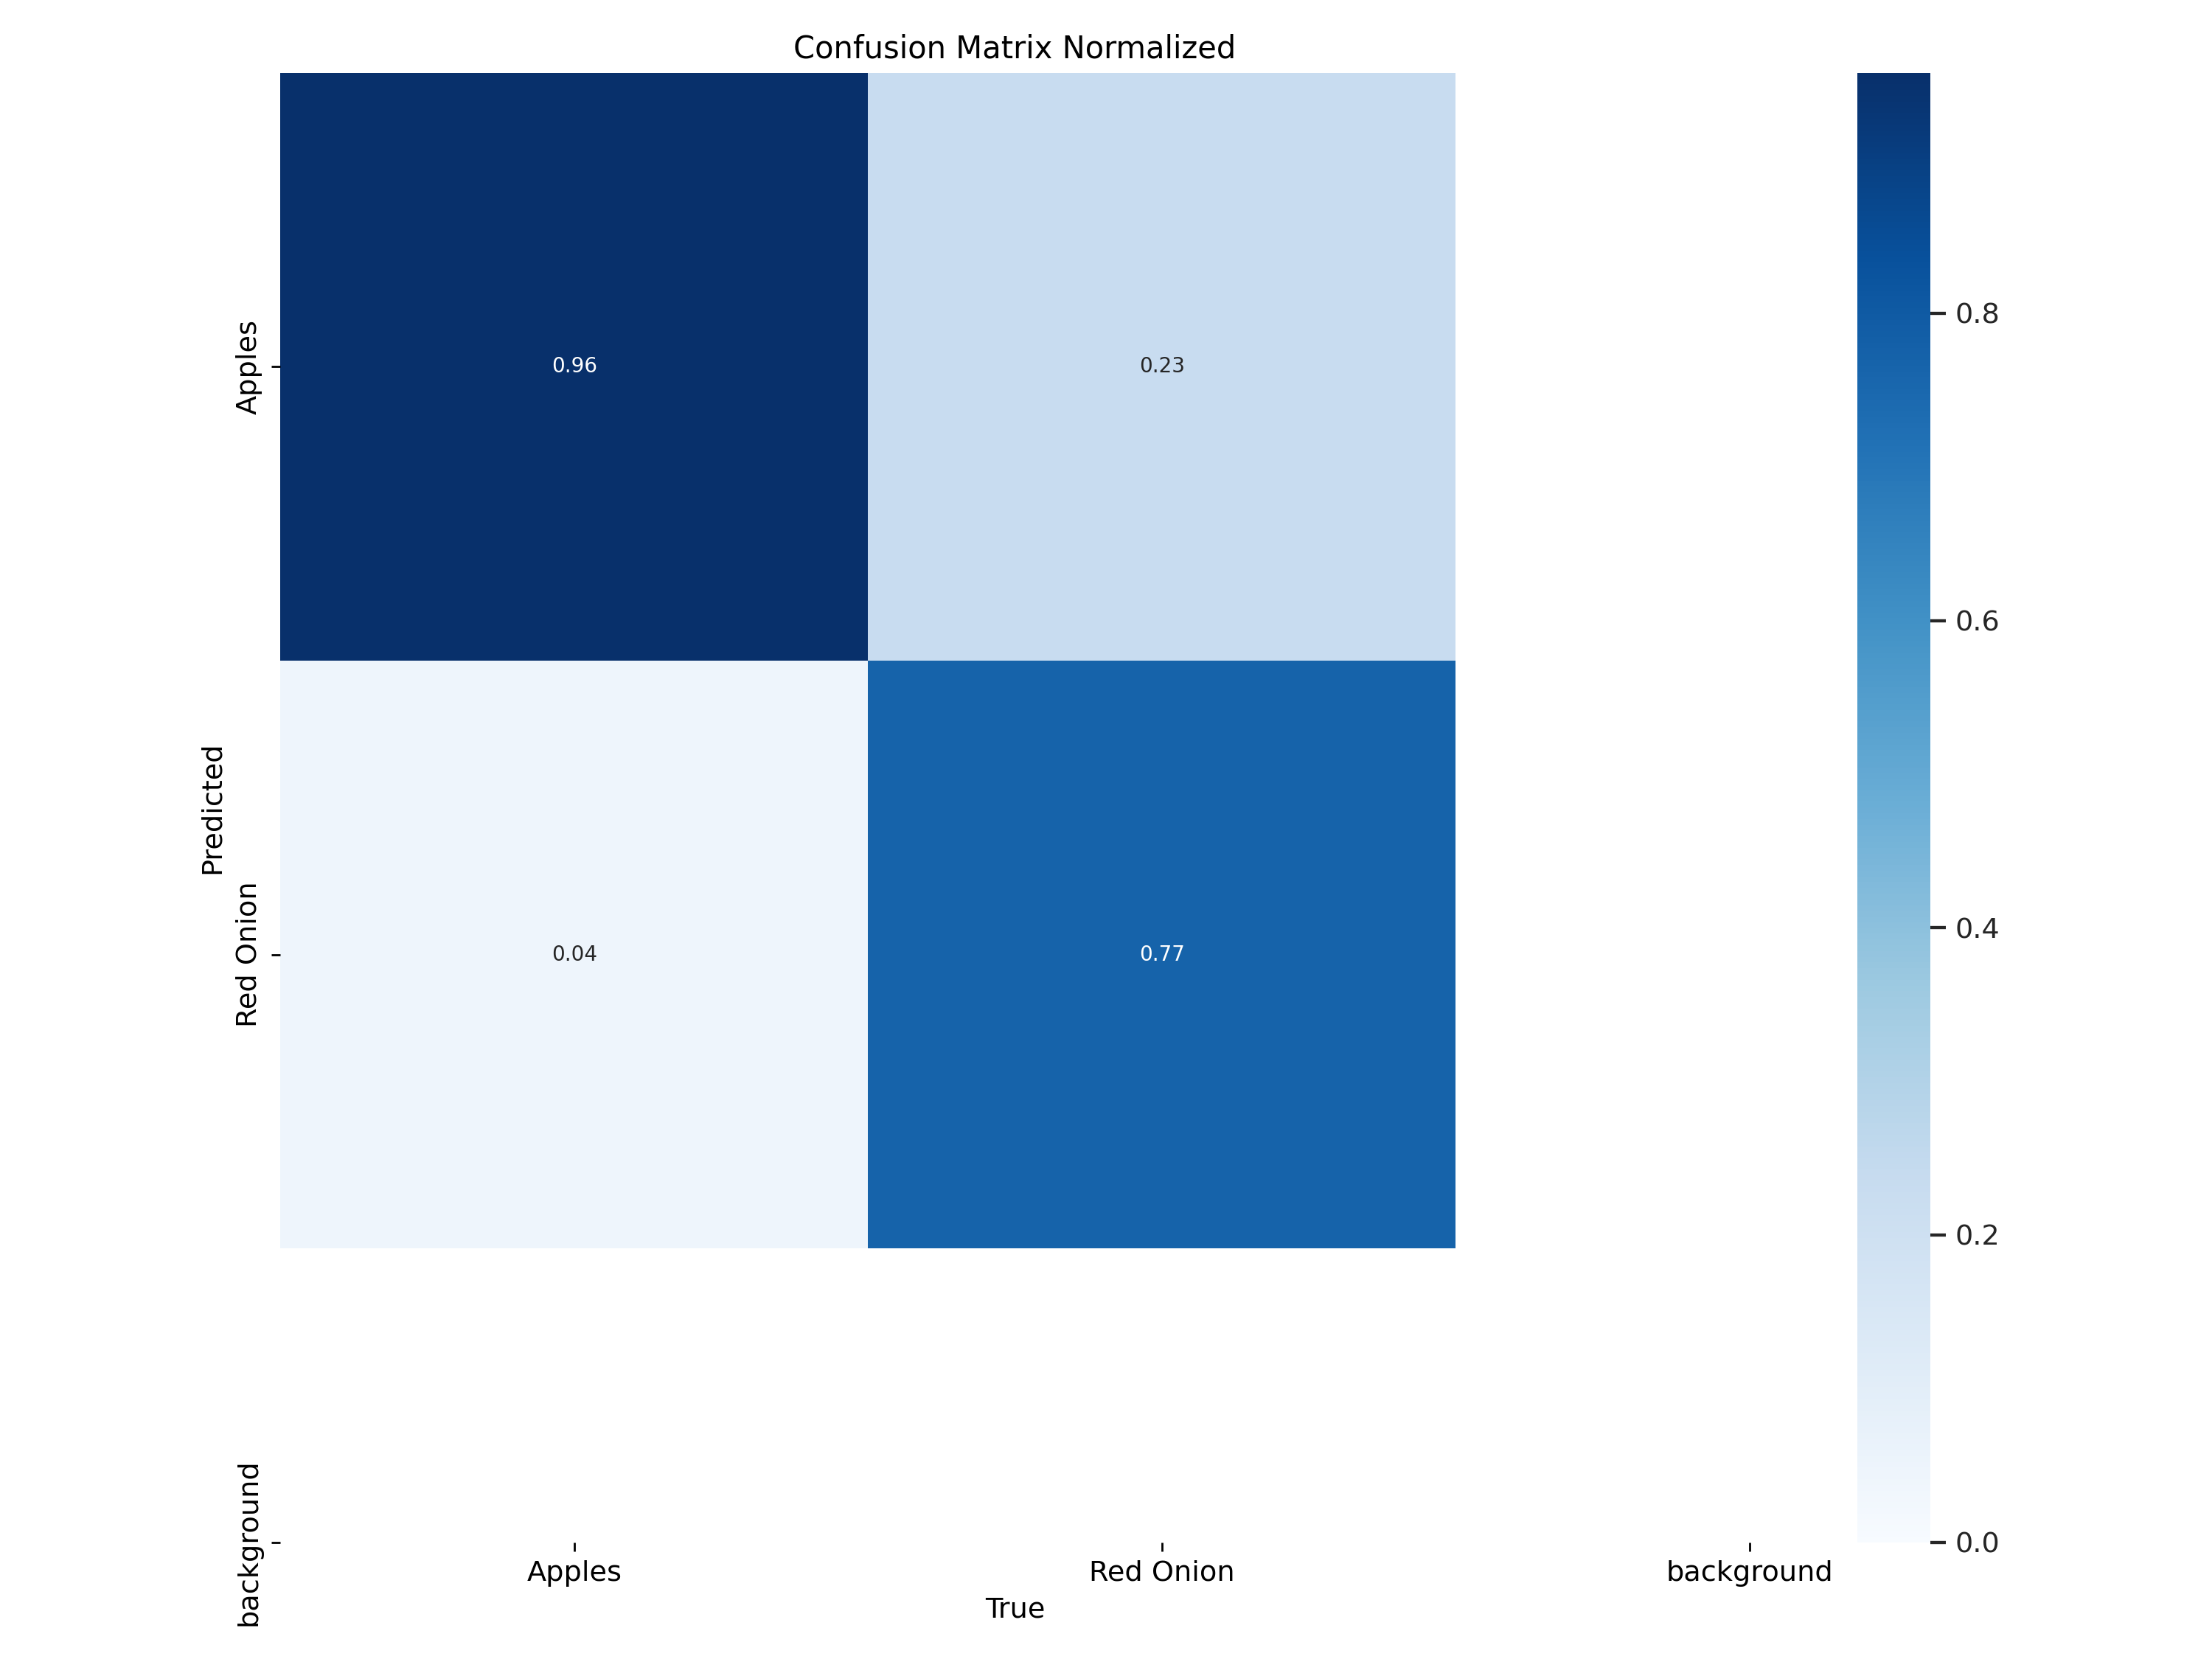

In [54]:
%matplotlib inline
from PIL import Image

#confusing matrix for train 2 (model 3, s, epochs=15,patience=5,batch=8, lr0=0.0005,imgsz=640)
Image.open('/content/drive/MyDrive/Colab Notebooks/Computer Vision/runs/classify/val8/confusion_matrix_normalized.png')

### Model 4 (m, epochs=25,patience=5,batch=8, imgsz=640) (val9)

In [15]:
#https://www.geeksforgeeks.org/confusion-matrix-machine-learning/

#MODEL4 (m, epochs=25,patience=5,batch=8, imgsz=640)

metrics4 = model4.val()
#because we only have 2 classes!
metrics4.top1

Ultralytics YOLOv8.1.27 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8m-cls summary (fused): 103 layers, 15765218 parameters, 0 gradients, 41.6 GFLOPs
train: /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/train... found 42 images in 2 classes ✅ 
val: /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/val... found 40 images in 2 classes ✅ 
test: None...


val: Scanning /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/val... 36 images, 0 corrupt: 100%|██████████| 36/36 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/val/Apples/20240313_135641.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/val/Apples/20240313_140215.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/val/Apples/20240313_140243.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/val/Apples/20240313_140304.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/val/Apples/20240313_140314.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/val/Apples/20240313_140328.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/Computer Vision/Photos/val/Apples/20240313_140337.jpg: corrupt JPEG restored and saved
val: W


               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:52<00:00, 17.42s/it]


                   all          1          1
Speed: 0.0ms preprocess, 889.0ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/val9


1.0

##Prediction

Testing the model with a  random one off image

In [20]:
model.names

{0: 'Apples', 1: 'Red Onion'}

### Model 1 (nano, epochs=2, patience=5, batch=8, lr0=0.0005, imgsz=640) (predict3 folder)

In [39]:
#model 1 (nano, epochs=2, patience=5, batch=8, lr0=0.0005, imgsz=640)
results = model('https://github.com/merfurfu/Computer-Vision-Project/blob/vic_work/predict1.jpg', save=True)

for r in results:
  print(r.probs)

#this model predicted apples, this image is red onion (WRONG) (Apples 0.61, Red Onion 0.39, 8.8ms)


Found https://github.com/merfurfu/Computer-Vision-Project/blob/vic_work/predict1.jpg locally at predict1.jpg
image 1/1 /content/drive/MyDrive/Colab Notebooks/Computer Vision/predict1.jpg: 640x640 Apples 0.61, Red Onion 0.39, 8.8ms
Speed: 1154.4ms preprocess, 8.8ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/classify/predict3
ultralytics.engine.results.Probs object with attributes:

data: tensor([0.6062, 0.3938], device='cuda:0')
orig_shape: None
shape: torch.Size([2])
top1: 0
top1conf: tensor(0.6062, device='cuda:0')
top5: [0, 1]
top5conf: tensor([0.6062, 0.3938], device='cuda:0')


In [42]:
results = model('/content/drive/MyDrive/Colab Notebooks/Computer Vision/prediction3.jpg', save=True)

for r in results:
  print(r.probs)

#this model predicted apples (CORRECT) (Apples 0.54, Red Onion 0.46, 4.2ms)


image 1/1 /content/drive/MyDrive/Colab Notebooks/Computer Vision/prediction3.jpg: 640x640 Apples 0.54, Red Onion 0.46, 4.2ms
Speed: 111.6ms preprocess, 4.2ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/classify/predict3
ultralytics.engine.results.Probs object with attributes:

data: tensor([0.5445, 0.4555], device='cuda:0')
orig_shape: None
shape: torch.Size([2])
top1: 0
top1conf: tensor(0.5445, device='cuda:0')
top5: [0, 1]
top5conf: tensor([0.5445, 0.4555], device='cuda:0')


### Model 2 (n, epochs=15,patience=5,batch=8, lr0=0.0005,imgsz=640) (predict2 folder)

In [43]:
#model 2 (n, epochs=15,patience=5,batch=8, lr0=0.0005,imgsz=640)
results = model2('https://github.com/merfurfu/Computer-Vision-Project/blob/vic_work/predict1.jpg', save=True)

for r in results:
  print(r.probs)
#predicted it as apple again (INCORRECT)(Apples 0.69, Red Onion 0.31)


Found https://github.com/merfurfu/Computer-Vision-Project/blob/vic_work/predict1.jpg locally at predict1.jpg
image 1/1 /content/drive/MyDrive/Colab Notebooks/Computer Vision/predict1.jpg: 640x640 Apples 0.69, Red Onion 0.31, 4.1ms
Speed: 1997.5ms preprocess, 4.1ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/classify/predict2
ultralytics.engine.results.Probs object with attributes:

data: tensor([0.6912, 0.3088], device='cuda:0')
orig_shape: None
shape: torch.Size([2])
top1: 0
top1conf: tensor(0.6912, device='cuda:0')
top5: [0, 1]
top5conf: tensor([0.6912, 0.3088], device='cuda:0')


In [38]:
#model 2 (n, epochs=15,patience=5,batch=8, lr0=0.0005,imgsz=640)
results2 = model2('/content/drive/MyDrive/Colab Notebooks/Computer Vision/prediction3.jpg', save=True)

for r in results:
  print(r.probs)
 #model predicted apple which is correct (Apples 0.55, Red Onion 0.45, 4.1ms)


Found https://github.com/merfurfu/Computer-Vision-Project/blob/vic_work/predict3.jpg locally at predict3.jpg
image 1/1 /content/drive/MyDrive/Colab Notebooks/Computer Vision/predict3.jpg: 640x640 Apples 0.55, Red Onion 0.45, 4.1ms
Speed: 100.6ms preprocess, 4.1ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/classify/predict2
ultralytics.engine.results.Probs object with attributes:

data: tensor([0.5751, 0.4249], device='cuda:0')
orig_shape: None
shape: torch.Size([2])
top1: 0
top1conf: tensor(0.5751, device='cuda:0')
top5: [0, 1]
top5conf: tensor([0.5751, 0.4249], device='cuda:0')


### Model 3 (s, epochs=15,patience=5,batch=8, lr0=0.0005,imgsz=640) (predict4)

In [8]:
#Model 3 (s, epochs=15,patience=5,batch=8, lr0=0.0005,imgsz=640)
results = model3('https://github.com/merfurfu/Computer-Vision-Project/blob/vic_work/predict1.jpg', save=True)

for r in results:
  print(r.probs)
#predicted it as apple again!!!!!!!!!!!(INCORRECT)(Apples 0.64, Red Onion 0.36)


Found https://github.com/merfurfu/Computer-Vision-Project/blob/vic_work/predict1.jpg locally at predict1.jpg


100%|██████████| 755k/755k [00:00<00:00, 17.4MB/s]


image 1/1 /content/drive/MyDrive/Colab Notebooks/Computer Vision/predict1.jpg: 640x640 Apples 0.64, Red Onion 0.36, 427.0ms
Speed: 313.5ms preprocess, 427.0ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/classify/predict4
ultralytics.engine.results.Probs object with attributes:

data: tensor([0.6449, 0.3551])
orig_shape: None
shape: torch.Size([2])
top1: 0
top1conf: tensor(0.6449)
top5: [0, 1]
top5conf: tensor([0.6449, 0.3551])


In [10]:
results = model3('/content/drive/MyDrive/Colab Notebooks/Computer Vision/prediction3.jpg', save=True)

for r in results:
  print(r.probs)
#predicted it as apple again!!!!!!!!!!!(INCORRECT)(Apples 0.52, Red Onion 0.48)


image 1/1 /content/drive/MyDrive/Colab Notebooks/Computer Vision/prediction3.jpg: 640x640 Apples 0.52, Red Onion 0.48, 303.2ms
Speed: 214.0ms preprocess, 303.2ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/classify/predict4
ultralytics.engine.results.Probs object with attributes:

data: tensor([0.5192, 0.4808])
orig_shape: None
shape: torch.Size([2])
top1: 0
top1conf: tensor(0.5192)
top5: [0, 1]
top5conf: tensor([0.5192, 0.4808])


### Model 4 (m, epochs=25,patience=5,batch=8, imgsz=640)

In [16]:
#Model 4 (m, epochs=100,patience=5,batch=8, imgsz=640)
results = model4('https://github.com/merfurfu/Computer-Vision-Project/blob/vic_work/predict1.jpg', save=True)

for r in results:
  print(r.probs)

#also incorrect(Apples 0.65, Red Onion 0.35)


Found https://github.com/merfurfu/Computer-Vision-Project/blob/vic_work/predict1.jpg locally at predict1.jpg
image 1/1 /content/drive/MyDrive/Colab Notebooks/Computer Vision/predict1.jpg: 640x640 Apples 0.65, Red Onion 0.35, 1315.6ms
Speed: 170.2ms preprocess, 1315.6ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/classify/predict5
ultralytics.engine.results.Probs object with attributes:

data: tensor([0.6468, 0.3532])
orig_shape: None
shape: torch.Size([2])
top1: 0
top1conf: tensor(0.6468)
top5: [0, 1]
top5conf: tensor([0.6468, 0.3532])


In [17]:
results = model4('/content/drive/MyDrive/Colab Notebooks/Computer Vision/prediction3.jpg', save=True)

for r in results:
  print(r.probs)

#predicted it as apples but barely (Apples 0.50, Red Onion 0.50)


image 1/1 /content/drive/MyDrive/Colab Notebooks/Computer Vision/prediction3.jpg: 640x640 Apples 0.50, Red Onion 0.50, 812.7ms
Speed: 180.3ms preprocess, 812.7ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/classify/predict5
ultralytics.engine.results.Probs object with attributes:

data: tensor([0.5045, 0.4955])
orig_shape: None
shape: torch.Size([2])
top1: 0
top1conf: tensor(0.5045)
top5: [0, 1]
top5conf: tensor([0.5045, 0.4955])
